有意性検定
==========
ある事象が故意なのか偶然なのかを調べたいときがあると思います。
例えば、物理と化学のテストの平均点が異なるとき、それは偶然の結果なのか、明らかに難易度が違ったのかを調べたいとします。

このとき用いられる方法が有意性検定です。

まずは物理と化学のテスト結果をそれぞれ40個準備します。

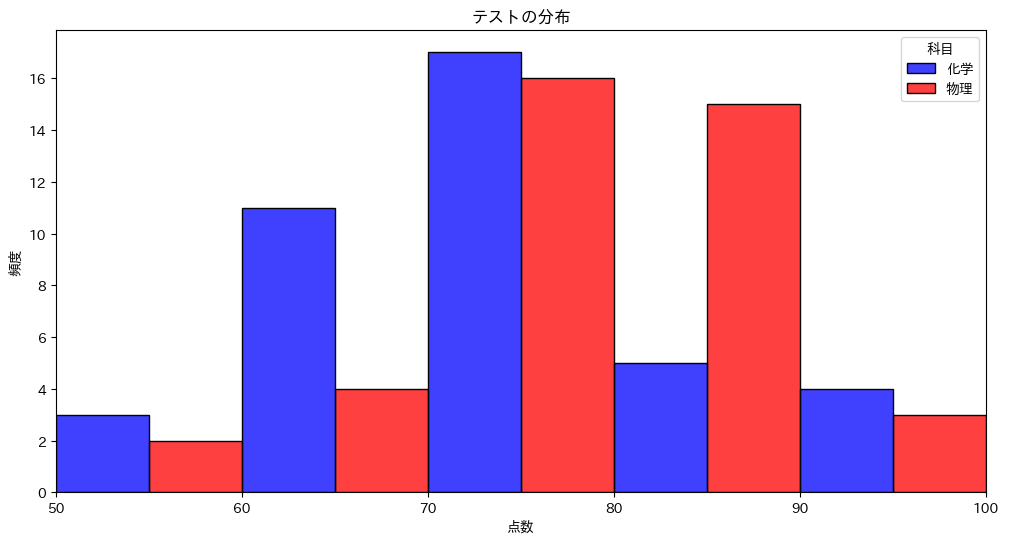

化学の平均点: 72.83
物理の平均点: 77.70


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas as pd

np.random.seed(42)

chemistry = np.random.normal(loc=75, scale=10, size=40).round().astype(int)
physics = np.random.normal(loc=78, scale=10, size=40).round().astype(int)

# データフレームの作成
df = pd.DataFrame({
    '化学': chemistry,
    '物理': physics
})

# データを長形式に変換
df_melted = df.melt(var_name='科目', value_name='点数')

bins = range(50, 101, 10)

plt.figure(figsize=(12, 6))
sns.histplot(data=df_melted, x='点数', hue='科目', bins=bins, 
             multiple="dodge", palette=['blue', 'red'])

plt.title('テストの分布')
plt.xlabel('点数')
plt.ylabel('頻度')
plt.xticks(bins)
plt.xlim(50, 100)
plt.show()

print(f"化学の平均点: {np.mean(chemistry):.2f}")
print(f"物理の平均点: {np.mean(physics):.2f}")


ヒストグラム以外の方法でも見てみましょう。

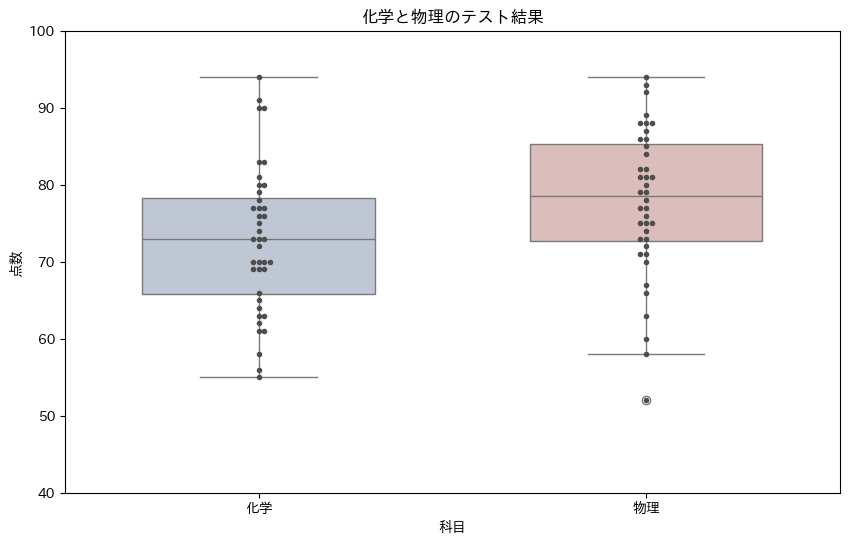

In [2]:
from scipy import stats

df = pd.DataFrame({
    '科目': ['化学']*40 + ['物理']*40,
    '点数': np.concatenate([chemistry, physics])
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='科目', y='点数', data=df, width=.6, hue='科目', palette="vlag", legend=False)
sns.swarmplot(x='科目', y='点数', data=df, size=4, color=".3", linewidth=0)

plt.title('化学と物理のテスト結果')
plt.ylim(40, 100)
plt.show()

このプログラムでは、箱ひげ図（boxplot）とスウォームプロット（swarmplot）で表示しています。
これらを組み合わせたこのグラフは、データの分布を視覚的に理解するのに効果的です。
それぞれの方法について説明します。

- 箱ひげ図
   - 箱の下端は第1四分位数（25パーセンタイル）を示します。
   - 箱の中の線は中央値（メディアン、50パーセンタイル）を示します。
   - 箱の上端は第3四分位数（75パーセンタイル）を示します。
   - 箱の長さは四分位範囲を表し、データの散らばりを示します。
   - ひげ（箱から伸びる線）は、95%程度の範囲を示します。物理だと1つ点がこの線を超えてありますが、外れ値という意味になります。

- スウォームプロット
   - 各点は個々の学生のスコアを表します。
   - 点は横方向にずらして配置され、重なりを避けています。これにより、同じまたは近い点数の頻度が視覚的に分かります。
   - このプロットにより、データの実際の分布や外れ値を直接観察できます。

## t検定

では、このデータを使って有意性検定をしてみましょう。
このプログラムでは有意性検定でよく使われるt検定をします。

In [3]:
from scipy import stats

_, p_value = stats.ttest_ind(chemistry, physics)
print(f"p値: {p_value:.4f}")

_, p_value = stats.ttest_ind(physics, physics)
print(f"同じデータでのp値: {p_value:.4f}")

p値: 0.0260
同じデータでのp値: 1.0000


プログラム中で使われている`_`は慣用的に値を無視したい場合に使われる変数名です。
`stats.ttest_ind()`関数は2つの値を返しますが、最初の値は使わないため、`_`という変数名にしています。

`stats.ttest_ind()`関数はお互いに関係のないグループの平均が統計的に有意な差があるかどうかを判断するために使われます。

p値は2つのグループに差がないと仮定したとき、観測されたデータが得られる確率を表します。
つまり、全く同じデータなら、差がなかったので、1になるわけです。
確率なので、p値が小さいほど、**差がある**と考えられます。
普通は、p値が0.05より小さければ差があると判断します。
今回は0.05より小さいので、差がある。つまり偶然ではないと判断します。

t検定は、2つの群の平均値の差を、その差の標準誤差で割った値（t値）を計算します。

```{math}
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
```

ここで、
- $\bar{x}_1$, $\bar{x}_2$ は各群の平均値
- $s_1^2$, $s_2^2$ は各群の分散
- $n_1$, $n_2$ は各群のサンプルサイズ


この t値が、自由度に応じたt分布の臨界値を超えるかどうかで、差の有意性を判断しています。